# CODE TO CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS

# STEP 0: PROBLEM STATEMENT

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images.
- Classes are as listed below:

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.

@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}



# STEP 1: IMPORT LIBRARIES AND DATASET

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import libraries
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [ ]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

In [ ]:
X_test.shape

(12630, 32, 32, 3)

In [ ]:
y_test.shape

(12630,)

In [ ]:
X_validation.shape

(4410, 32, 32, 3)

In [ ]:
y_validation.shape

(4410,)

# STEP 2: IMAGE EXPLORATION

36

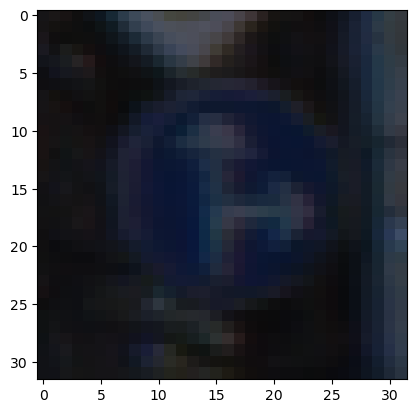

In [ ]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

17

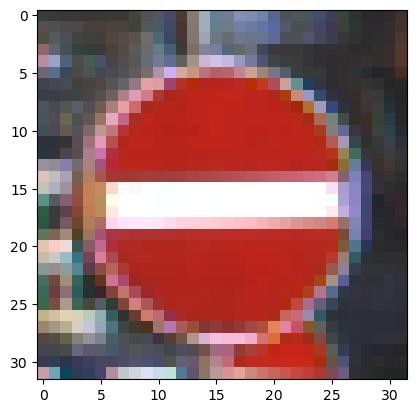

In [ ]:
i = 1000
plt.imshow(X_test[i]) # Show images are not shuffled
y_test[i]

4

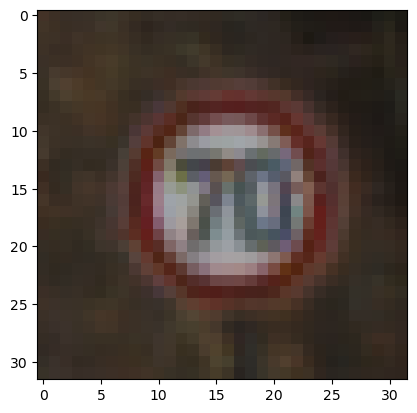

In [ ]:
i = 1000
plt.imshow(X_validation[i]) # Show images are not shuffled
y_validation[i]

# STEP 3: DATA PEPARATION

In [ ]:
## Shuffle the dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
# Converting the RGB image to grayscale
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True)

In [ ]:
X_train_gray.shape

(34799, 32, 32, 1)

In [ ]:
X_test_gray.shape

(12630, 32, 32, 1)

In [ ]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [ ]:
# Normalizing the grayscaled Image Data
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [ ]:
# By normalizing we get the value between -1 and 1
X_train_gray_norm

array([[[[-0.8515625 ],
         [-0.859375  ],
         [-0.86979167],
         ...,
         [-0.8671875 ],
         [-0.85416667],
         [-0.85677083]],

        [[-0.85416667],
         [-0.86197917],
         [-0.859375  ],
         ...,
         [-0.859375  ],
         [-0.85416667],
         [-0.8515625 ]],

        [[-0.83854167],
         [-0.85416667],
         [-0.86197917],
         ...,
         [-0.85677083],
         [-0.8515625 ],
         [-0.84375   ]],

        ...,

        [[-0.8515625 ],
         [-0.85416667],
         [-0.8515625 ],
         ...,
         [-0.86979167],
         [-0.86979167],
         [-0.86979167]],

        [[-0.85677083],
         [-0.859375  ],
         [-0.85416667],
         ...,
         [-0.8671875 ],
         [-0.86458333],
         [-0.86458333]],

        [[-0.84895833],
         [-0.85416667],
         [-0.84635417],
         ...,
         [-0.859375  ],
         [-0.86458333],
         [-0.86197917]]],


       [[[ 0.03125   ],


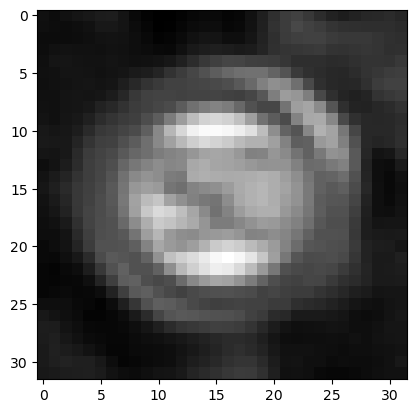

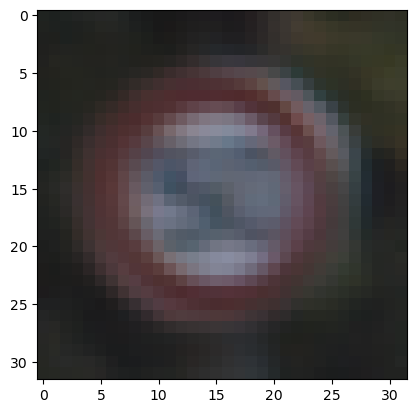

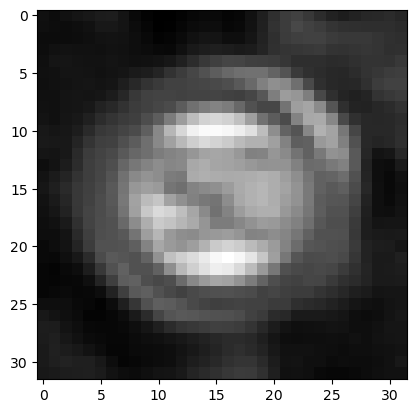

In [ ]:
# Checking image data after performing normalization
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i], cmap='gray')

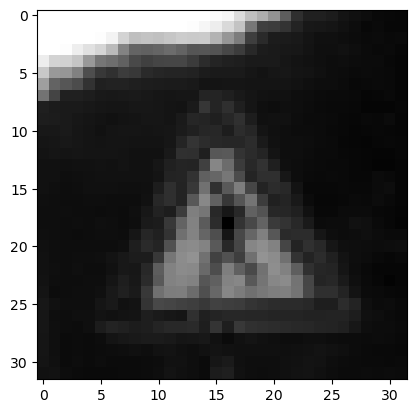

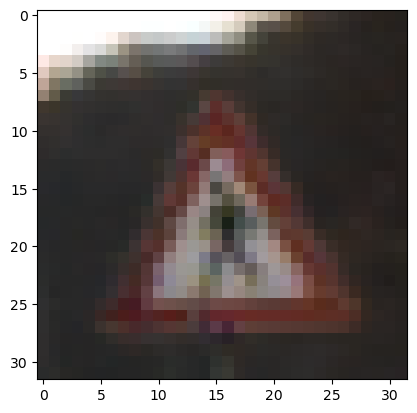

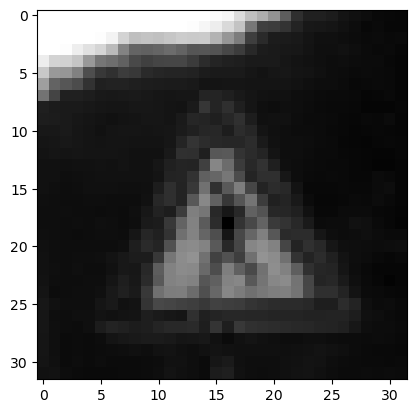

In [ ]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i], cmap='gray')

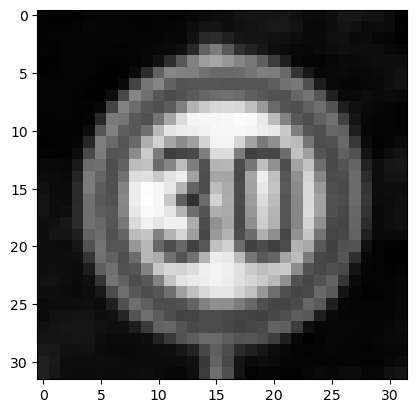

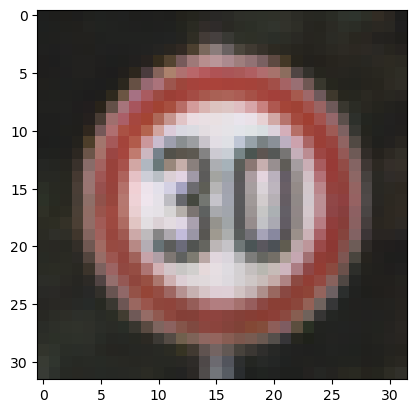

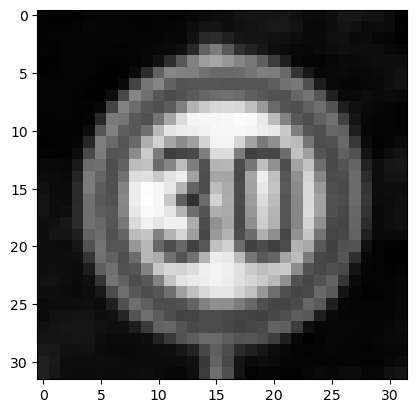

In [ ]:
i = 500
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i], cmap='gray')

In [ ]:
# all images are intact

# STEP 4: MODEL TRAINING

The model consists of the following layers:

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, AveragePooling2D, Flatten, Conv2D, Dropout

In [ ]:
cnn = Sequential()

In [ ]:
# First convolutional network
cnn.add(Conv2D(filters= 6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
cnn.add(AveragePooling2D())
# Adding 2nd convolutional network
cnn.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
cnn.add(AveragePooling2D())
# Flattening the Network
cnn.add(Flatten())
# Adding 1st full connection layer
cnn.add(Dense(units=120, activation='relu'))
# Adding 2nd full connection layer
cnn.add(Dense(units=84, activation='relu'))
# Adding 3rd full connection layer aka output layer
cnn.add(Dense(units=43, activation='softmax'))

In [ ]:
# compiling the network
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = cnn.fit(X_train_gray_norm, y_train, batch_size=32, epochs=12, verbose= 1, validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/12
1088/1088 [==============================] - 11s 9ms/step - loss: 1.1460 - accuracy: 0.6840 - val_loss: 0.5775 - val_accuracy: 0.8263
Epoch 2/12
1088/1088 [==============================] - 10s 9ms/step - loss: 0.3002 - accuracy: 0.9173 - val_loss: 0.4397 - val_accuracy: 0.8744
Epoch 3/12
1088/1088 [==============================] - 12s 11ms/step - loss: 0.1666 - accuracy: 0.9552 - val_loss: 0.3837 - val_accuracy: 0.8986
Epoch 4/12
1088/1088 [==============================] - 12s 11ms/step - loss: 0.1168 - accuracy: 0.9680 - val_loss: 0.3958 - val_accuracy: 0.8916
Epoch 5/12
1088/1088 [==============================] - 12s 11ms/step - loss: 0.0871 - accuracy: 0.9762 - val_loss: 0.3549 - val_accuracy: 0.9052
Epoch 6/12
1088/1088 [==============================] - 12s 11ms/step - loss: 0.0608 - accuracy: 0.9827 - val_loss: 0.3750 - val_accuracy: 0.9041
Epoch 7/12
1088/1088 [==============================] - 11s 10ms/step - loss: 0.0502 - accuracy: 0.9859 - val_loss: 0.3256 - v

# STEP 5: MODEL EVALUATION

In [ ]:
score = cnn.evaluate(X_test_gray_norm, y_test)
print("Test Accuracy: {}".format(score[1]))

395/395 [==============================] - 2s 5ms/step - loss: 0.7081 - accuracy: 0.9038
Test Accuracy: 0.9038004875183105


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
Accuracy = history.history['accuracy']
Loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

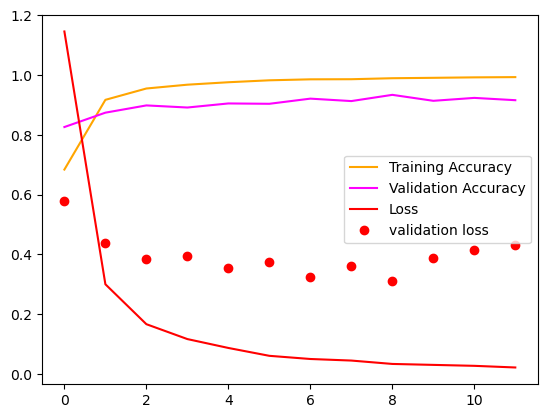

In [ ]:
epochs = range(len(Accuracy))
plt.plot(epochs, Accuracy, c='orange', label='Training Accuracy')
plt.plot(epochs, val_accuracy, c='magenta', label='Validation Accuracy')
plt.plot(epochs, Loss, c='red', label='Loss')
plt.plot(epochs, val_loss , 'ro', label='validation loss')
plt.legend()

In [ ]:
y_pred  = np.argmax(cnn.predict(X_test_gray_norm), axis = -1)

395/395 [==============================] - 2s 4ms/step


<Axes: >

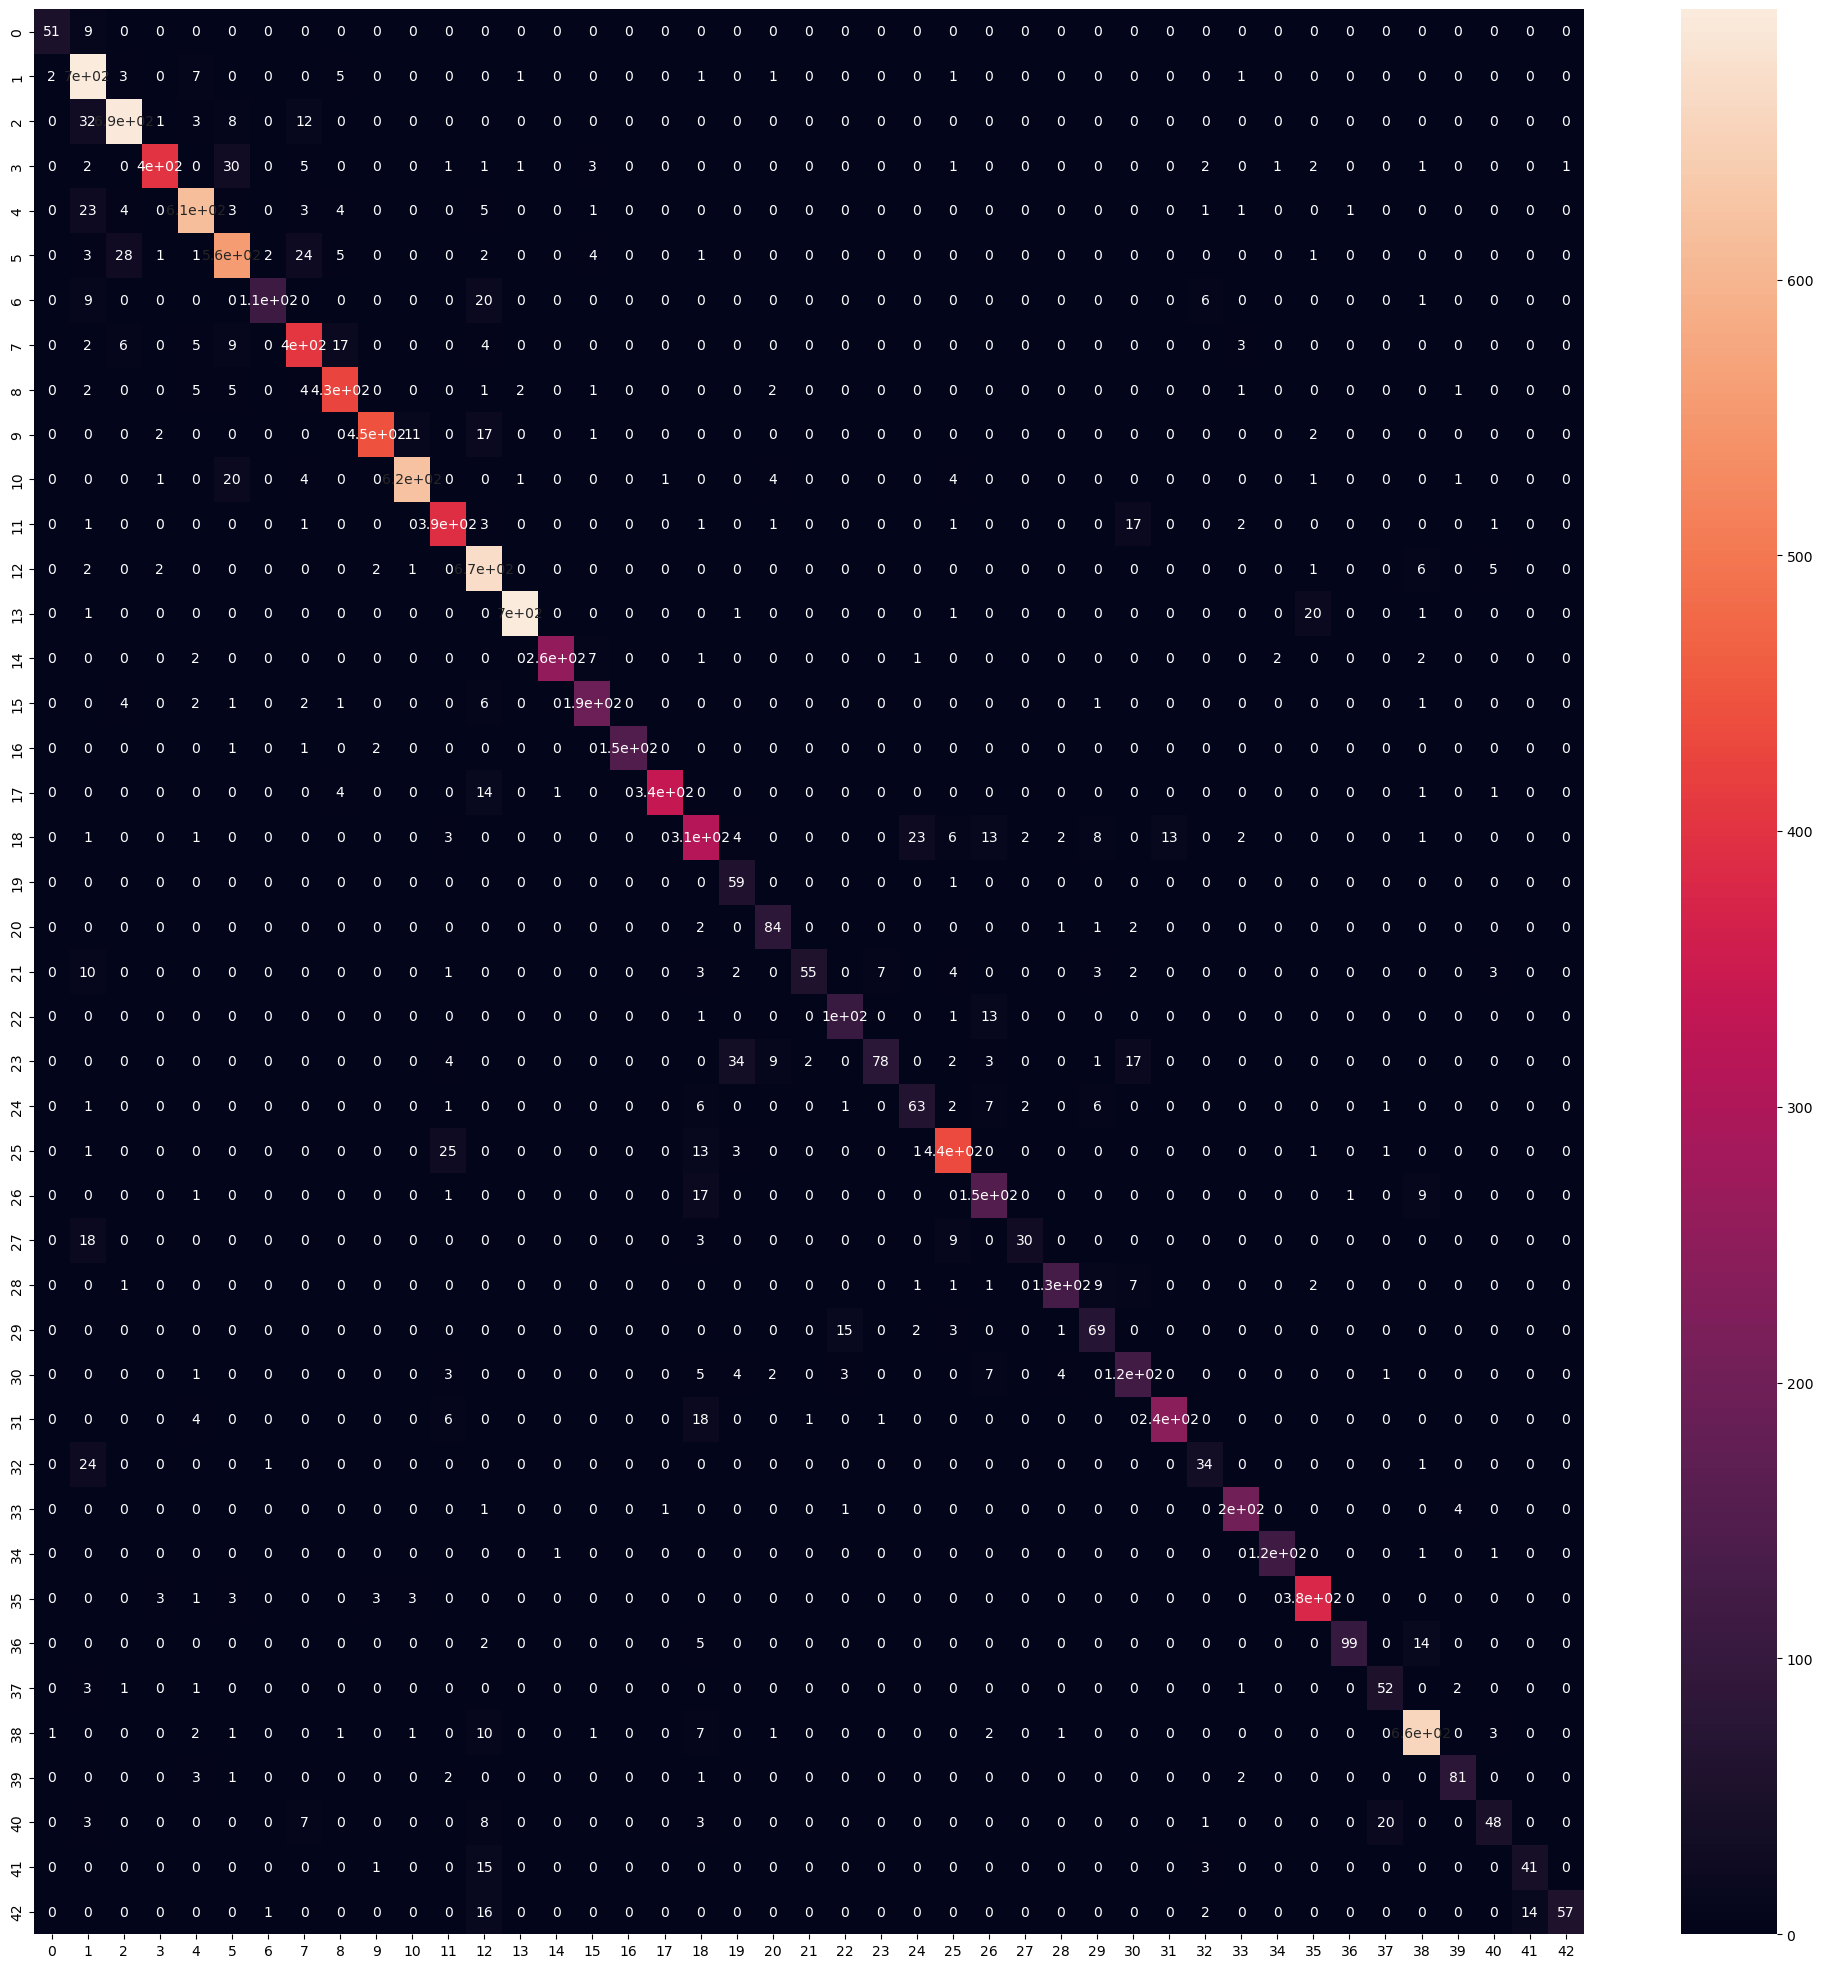

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize= (25, 25))
sns.heatmap(cm, annot=True)

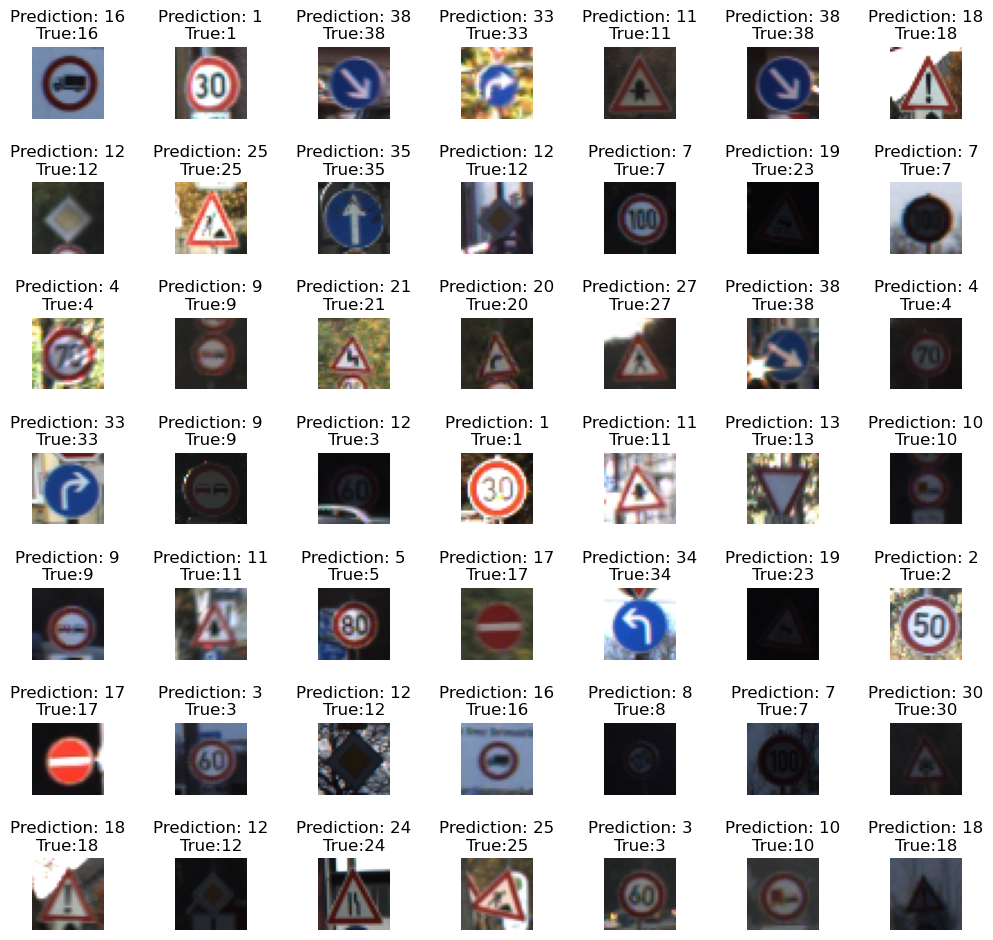

In [ ]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction: {}\nTrue:{}".format(y_pred[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

# GREAT JOB! NOW YOU'VE MASTERED CNNS TRAINING USING KERAS!